<a href="https://colab.research.google.com/github/LeonardoAlunaM/COMPUTADORAS-Y-PROGRAMACI-N-2O23-/blob/main-COMPUTADORAS-Y-PROGTRAMACI%C3%93N-2023/Ecuaciones_Diferenciales_Criptografia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def Euclides_extendido(e, b):
    if b == 0:
        return e, 1, 0
    else:
        d, x, y = Euclides_extendido(b, e % b)
        return d, y, x - (e // b) * y


def sol_congruencia_lineal(e, b, m):
    d, x, y = Euclides_extendido(e, m)
    if b % d == 0:
        x0 = (x * (b // d)) % m
        solucion = [] # El valor D
        for i in range(d):
            solucion.append((x0 + i * (m // d)) % m)
        return solucion
    else:
        return []


# Ingresar los valores implicados en la solución de la congruencia lineal
e = 127  
b = 1   # b = 1 por convención
m = 25456  # m = n = módulo de la congruencia


solucion = sol_congruencia_lineal(e, b, m)
if solucion:
    print("Las soluciones para la congruencia lineal {}D ≡ {} (mod {}) son:".format(e, b, m))
    for solution in solucion:
        print("D ≡ {} (mod {})".format(solucion, m))
else:
    print("No hay soluciones para la congruencia lineal {}D ≡ {} (mod {})".format(e, b, m))

Las soluciones para la congruencia lineal 127D ≡ 1 (mod 25456) son:
D ≡ [6815] (mod 25456)


In [ ]:
# Para cifrar 


In [ ]:
# Para descifrar 


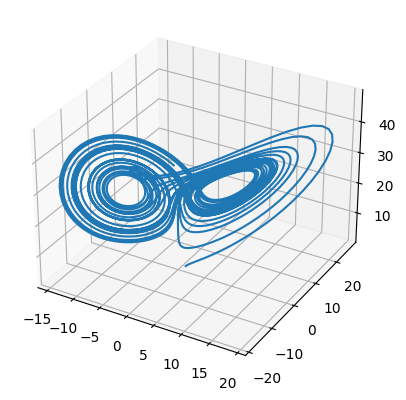

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0
sigma = 10.0
beta = 8.0 / 5.0

def f(state, t):
    x, y, z = state  # Desempaqueta el vector de estado
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivadas

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.show()

In [ ]:
def logistic_map(r, x0, n):
    """
    Genera una secuencia de números pseudoaleatorios utilizando el mapa logístico.
   
    Args:
        r (float): Parámetro de control del mapa logístico (valor típico: 3.9).
        x0 (float): Valor inicial (semilla) del mapa logístico (entre 0 y 1).
        n (int): Número de iteraciones para generar la secuencia.
   
    Returns:
        list: Secuencia de números pseudoaleatorios generada.
    """
    sequence = []
    x = x0
   
    for _ in range(n):
        x = r * x * (1 - x)
        sequence.append(x)
   
    return sequence


# Parámetros de entrada
r = 3.9    # Parámetro de control del mapa logístico
x0 = 0.12   # Valor inicial (semilla)
n = 6     # Número de iteraciones


# Generación de la secuencia
sequence = logistic_map(r, x0, n)


# Imprimir la secuencia generada
print("Secuencia generada:", sequence)

Secuencia generada: [0.41184, 0.94468847616, 0.20378342076493888, 0.6327973789264871, 0.9062229389859944, 0.3314334029821663]


In [ ]:
from cryptography.hazmat.primitives import serialization
from cryptography.hazmat.primitives.asymmetric import ec


# Generar una clave privada para la curva elíptica
private_key = ec.generate_private_key(ec.SECP256R1())  # Utilizando la curva elíptica SECP256R1


# Obtener la clave pública correspondiente
public_key = private_key.public_key()


# Exportar la clave pública en formato PEM
pem_public_key = public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
)


# Imprimir la clave pública en formato PEM
print("Clave pública generada:")
print(pem_public_key.decode())

Clave pública generada:
-----BEGIN PUBLIC KEY-----
MFkwEwYHKoZIzj0CAQYIKoZIzj0DAQcDQgAEjlrbaJip+ntD8Gy6PXzKy2beXtS+
BnU/YxSlUlT4CjBjihTCLTQQCsCxOvpqs3oCnDUNz/7dK5wD3uL/BKTyqA==
-----END PUBLIC KEY-----



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def solve_schrodinger_equation(potential, x_range, num_points, time_step, num_steps):
    # Definir los parámetros
    hbar = 1.0  # Constante reducida de Planck
    mass = 1.0  # Masa de la partícula
    dx = (x_range[1] - x_range[0]) / num_points
    dt = time_step
    
    # Inicializar la función de onda
    x = np.linspace(x_range[0], x_range[1], num_points)
    psi = np.exp(-(x**2) / 2.0)  # Función de onda inicial
    
    # Iterar en el tiempo
    for step in range(num_steps):
        # Calcular la derivada segunda de psi
        d2psi = (psi[:-2] - 2*psi[1:-1] + psi[2:]) / dx**2
        
        # Calcular el potencial
        V = potential(x[1:-1])
        
        # Calcular el término temporal
        time_term = (1j * hbar * dt) / (2 * mass)
        
        # Resolver la ecuación de Schrödinger
        psi[1:-1] += time_term * (d2psi - V * psi[1:-1])
    
    return x, psi

# Función de potencial
def harmonic_oscillator_potential(x):
    return 0.5 * x**2  # Oscilador armónico simple

# Resolver la ecuación de Schrödinger
x_range = (-5.0, 5.0)
num_points = 1000
time_step = 0.01
num_steps = 1000

x, psi = solve_schrodinger_equation(harmonic_oscillator_potential, x_range, num_points, time_step, num_steps)

# Visualizar el resultado
plt.plot(x, np.abs(psi)**2)  # Probabilidad de encontrar la partícula
plt.xlabel('Posición')
plt.ylabel('Probabilidad')
plt.title('Función de onda en el oscilador armónico')
plt.show()

UFuncTypeError: ignored